In [3]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import seaborn as sns

In [4]:
iris = pd.read_csv("../../assets/datasets/iris.csv")
iris.head(n=5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df = pd.DataFrame(data=iris, columns=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name'])

In [6]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
def name_to_numeric(x):
    if x=='Iris-setosa':
        return 1
    if x=='Iris-virginica':
        return 2
    if x=='Iris-versicolor':
        return 3

In [9]:
df['name_num'] = df['Name'].apply(name_to_numeric)
del df['Name']


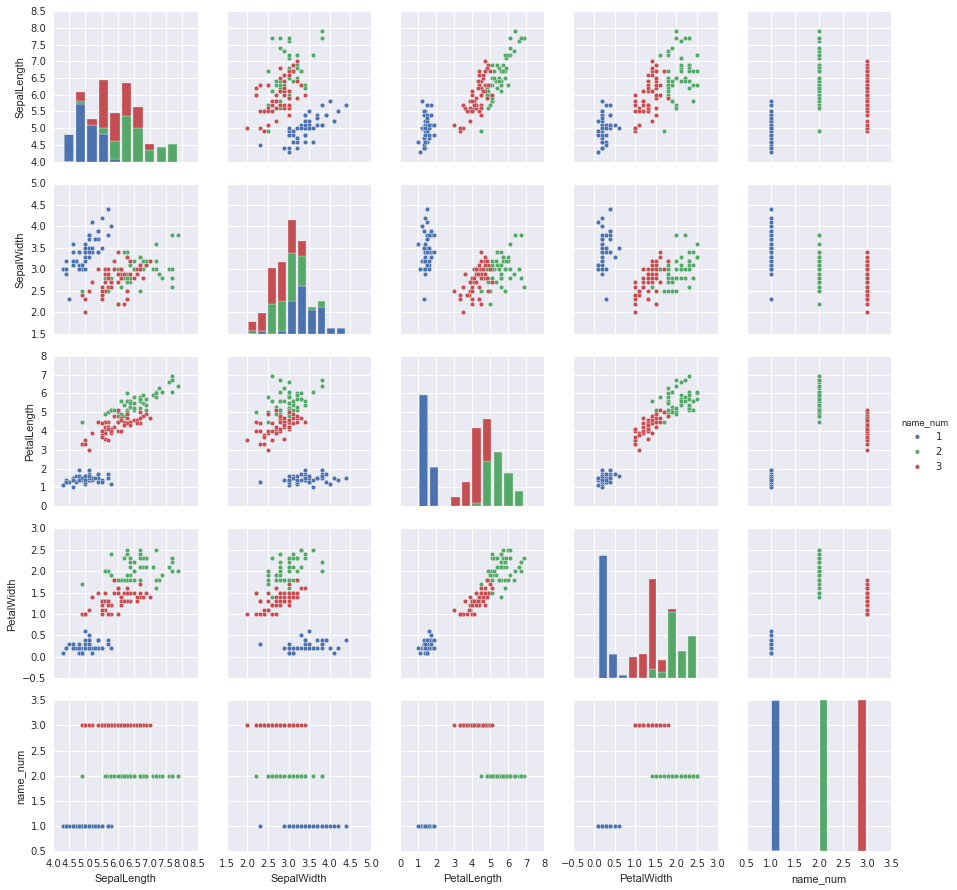

In [16]:
sns.pairplot(df, hue='name_num')

In [17]:
dn = df.as_matrix(columns=None)

In [25]:
dn[0:9]

array([[ 5.1,  3.5,  1.4,  0.2,  1. ],
       [ 4.9,  3. ,  1.4,  0.2,  1. ],
       [ 4.7,  3.2,  1.3,  0.2,  1. ],
       [ 4.6,  3.1,  1.5,  0.2,  1. ],
       [ 5. ,  3.6,  1.4,  0.2,  1. ],
       [ 5.4,  3.9,  1.7,  0.4,  1. ],
       [ 4.6,  3.4,  1.4,  0.3,  1. ],
       [ 5. ,  3.4,  1.5,  0.2,  1. ],
       [ 4.4,  2.9,  1.4,  0.2,  1. ]])

In [41]:
k = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(dn)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [42]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [43]:
metrics.silhouette_score(dn, labels, metric='euclidean')

0.6956509321199762